# Bandit Problem

In [1]:
# imports
from bandits import Bandit
import random
import matplotlib.pyplot as plt
import numpy as np
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [2]:
# number of bandits = n
n = 10
# number of iterations = N
N = 1000
bandits = [Bandit(random.random()*4-2) for _ in range(n)]
bandit_mean = []
for bandit in bandits:
    bandit_mean.append(bandit.get_mean())
print(bandit_mean)

[0.014131798881864555, -1.3667795028224203, 1.5694467467269684, 0.3980851659001696, 1.0675806126293024, -0.9046740894144025, 0.5516739065854841, 0.5202177864243533, -1.8346581168500835, 0.8431867559702972]


In [3]:
bandits[0].pullLever()

0.11848732060625461

## Greedy algorithm Implementation

In [4]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    bandit_rewards = [[] for i in range (n)]
    max_index = 0
    max_rew = -10000
    for i in range(n):
        x = bandits[i].pullLever()
        bandit_rewards[i].append(x)
        if max_rew<x:
            max_rew = x
            max_i = i
    for y in range(N-n):
        bandit_rewards[max_i].append(bandits[max_i].pullLever())
    return bandit_rewards

Plot the cumulative average of rewards as the number of iterations increases.

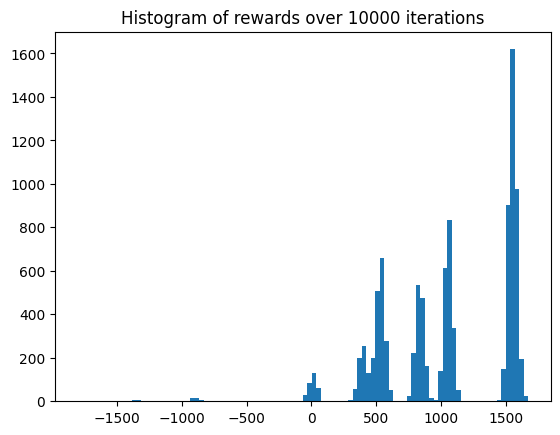

1042.410413988281


In [5]:
cumulative_sum = []
#the number of iterations - itr
itr = 10000
for x in range (itr):
    bandit_rewards = run_greedy()
    sum_score = 0
    for bandit in bandit_rewards:
        for y in bandit:
            sum_score+=y
    cumulative_sum.append(sum_score)
plt.hist(cumulative_sum,bins = 100)
plt.title(f"Histogram of rewards over {itr} iterations")
plt.show()
sum_score = 0
for score in cumulative_sum:
    sum_score += score
avg = sum_score/itr
print(avg)

In [6]:
optimal_reward= 1000*max(bandit_mean)
print(optimal_reward)
regret = optimal_reward - avg
print(regret)
print(f'{regret*100/optimal_reward} %')

1569.4467467269683
527.0363327386872
33.581026806918096 %


## $\epsilon$-greedy Algorithm

In [7]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    bandit_rewards = [[] for i in range (n)]
    for x in range(N):
        i = random.random()
        if i < epsilon:
            bandit_num = random.randint(0,n-1)
            bandit_rewards[bandit_num].append(bandits[bandit_num].pullLever())
        else:
            max_index=0
            max_val = -10000
            for j in range(n):
                if len(bandit_rewards[j]):
                    mean_val = sum(bandit_rewards[j])/len(bandit_rewards[j])
                else:
                    mean_val = 0
                if mean_val>max_val:
                    max_val = mean_val
                    max_index = j
            bandit_num = max_index
            bandit_rewards[bandit_num].append(bandits[bandit_num].pullLever())
            
    return bandit_rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

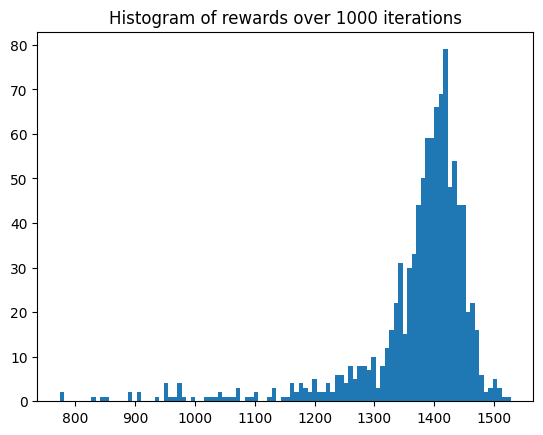

1371.6349349792101


In [8]:
cumulative_sum = []
#the number of iterations - itr
itr = 1000
for x in range (itr):
    bandit_rewards = run_epsilon_greedy(0.1)
    sum_score = 0
    for bandit in bandit_rewards:
        for y in bandit:
            sum_score+=y
    cumulative_sum.append(sum_score)
plt.hist(cumulative_sum,bins = 100)
plt.title(f"Histogram of rewards over {itr} iterations")
plt.show()
sum_score = 0
for score in cumulative_sum:
    sum_score += score
avg_epsilon = sum_score/itr
print(avg_epsilon)

In [9]:
regret_epsilon = optimal_reward - avg_epsilon
print(regret_epsilon)
print(f'{regret_epsilon*100/optimal_reward} %')

197.81181174775816
12.603919958436848 %


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

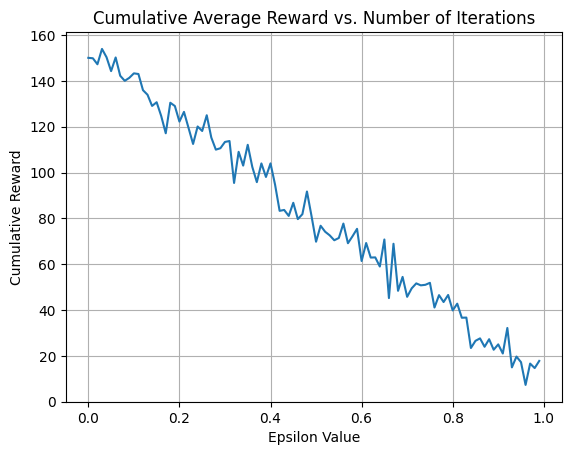

The reward is maximum at the value of epsilon 0.03


In [32]:
epsilon_values= [i/100 for i in range(100)]
cumulative_epsilon_sum = []
for val in epsilon_values:
    cumulative_sum = []
    for x in range (1):
        bandit_rewards = run_epsilon_greedy(val)
        sum_score = 0
        for bandit in bandit_rewards:
            for y in bandit:
                sum_score+=y
        cumulative_sum.append(sum_score)
    cumulative_sum_score = 0
    for score in cumulative_sum:
        cumulative_sum_score += score
    avg_epsilon = cumulative_sum_score/10
    cumulative_epsilon_sum.append(avg_epsilon)
plt.plot(epsilon_values, cumulative_epsilon_sum)
plt.xlabel("Epsilon Value")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Average Reward vs. Number of Iterations")
plt.grid()
plt.show()
print(f'The reward is maximum at the value of epsilon {np.argmax(cumulative_epsilon_sum)/100}')

In [21]:
max_val_at_epsilon = []
for alpha in range(100):
    epsilon_values= [i/100 for i in range(100)]
    cumulative_epsilon_sum = []
    for val in epsilon_values:
        cumulative_sum = []
        for x in range (1):
            bandit_rewards = run_epsilon_greedy(val)
            sum_score = 0
            for bandit in bandit_rewards:
                for y in bandit:
                    sum_score+=y
            cumulative_sum.append(sum_score)
        cumulative_sum_score = 0
        for score in cumulative_sum:
            cumulative_sum_score += score
        avg_epsilon = cumulative_sum_score/10
        cumulative_epsilon_sum.append(avg_epsilon)
    max_val_at_epsilon.append(np.argmax(cumulative_epsilon_sum)/100)
print(sum(max_val_at_epsilon)/len(max_val_at_epsilon))

0.010200000000000004


## Optimistic Initial Values

In [ ]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

## Optional - Upper Confidence Bound (UCB)

In [ ]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass